Make sure the package is installed first. How? Check the README.

In [1]:
import DRIFTS_package as ir

Using the read_logfile function we can read the logfile by specifying the setup and the file location.

In [2]:
path = 'example_data/data'

logfile = ir.read_logfile(setup='DeNOx', logfile_path = path)
print(logfile)

Multiple logfiles found! Combining them...
Converting logfile date and time to pandas DateTime...
Logfile read successfully.

      CO_sp  CO_flow  H2_sp  H2_flow  He_low_sp  He_low_flow  NO_sp  NO_flow  \
0       0.0    0.000    0.0      0.0        0.0        0.000    0.0      0.0   
1       0.0    0.000    0.0      0.0        0.0        0.000    0.0      0.0   
2       0.0    0.000    0.0      0.0        0.0        0.000    0.0      0.0   
3       0.0    0.000    0.0      0.0        0.0        0.000    0.0      0.0   
4       0.0    0.000    0.0      0.0        0.0        0.000    0.0      0.0   
...     ...      ...    ...      ...        ...          ...    ...      ...   
2118    0.0   24.995    0.0      0.0        0.0       15.044    0.0      0.0   
2119    0.0   24.995    0.0      0.0        0.0       15.044    0.0      0.0   
2120    0.0   24.995    0.0      0.0        0.0       15.044    0.0      0.0   
2121    0.0   24.995    0.0      0.0        0.0       15.044    0.0      0

We can parse the spectra .dx files with the parse_spectra function. Inverting the x axis can be useful for plotting later.

The function exports the spectra as .csv file and looks for it the next time that it is run. Set delete_previous to True to reparse the spectra.

In [3]:
path = 'example_data/data'

spectra = ir.parse_spectra(spectra_path = 'example_data/data/', invert_xaxis = True, delete_previous = False)
print(spectra)

Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, delete the raw_spectra.csv file in the folder.
                                    4497.331800  4495.903622  4494.475444  \
250502_HTE002_CAL005_COox_001_0000     0.309900     0.310020     0.310716   
250502_HTE002_CAL005_COox_001_0001     0.308362     0.308066     0.308121   
250502_HTE002_CAL005_COox_001_0002     0.309681     0.309751     0.309436   
250502_HTE002_CAL005_COox_001_0003     0.311286     0.310611     0.309150   
250502_HTE002_CAL005_COox_001_0004     0.306699     0.308042     0.310361   
...                                         ...          ...          ...   
250502_HTE002_CAL005_COox_001_0695     0.512363     0.511013     0.511185   
250502_HTE002_CAL005_COox_001_0696     0.532452     0.532531     0.531571   
250502_HTE002_CAL005_COox_001_0697     0.549462     0.549752     0.549383   
250502_HTE002_CAL005_COox_001_0698     0.566900     0.565125     0.565826 

To preview the raw spectra, the spectra can be plotted using the plot_spectra function.

Extra arguments are skip (every n'th spectrum is plotted) and save (set to True to save the figure).

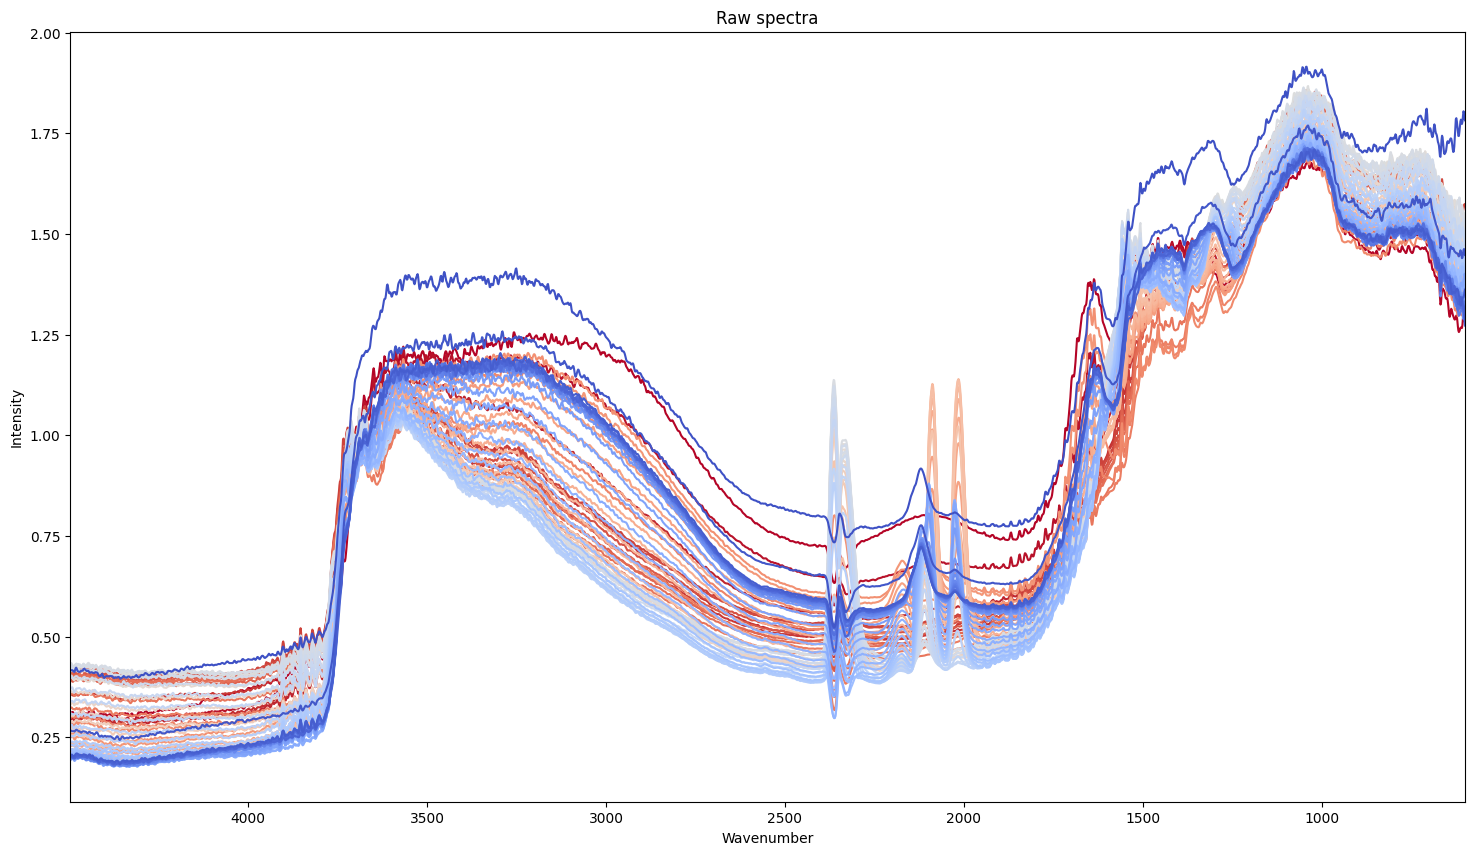

In [4]:
ir.quick_plot(spectra, skip = 10, save = False)

Merging logfile and spectra can be done with the merge_spectra_logfile function.

Optional arguments are the setup (default DeNOx), and the spectra_start_time. Default settings assume that spectra collection started at the same time as logfile collection. If not, specify a timestamp when spectra collection was started.

In [5]:
path = 'example_data/data/' # path to directory with both the spectra and the log file

merged_data = ir.merge_spectra_logfile(spectra_path = path, logfile_path = path, setup = 'DeNOx', spectra_start_time = None)
print(merged_data)

Multiple logfiles found! Combining them...
Converting logfile date and time to pandas DateTime...
Logfile read successfully.

Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, delete the raw_spectra.csv file in the folder.
Using first logfile time (2025-05-02 16:39:10) as start time of spectra.
Merging spectra with logfile...
Removed spectra after end of logfile. You can delete spectra from 0618 onwards
Spectra and logfile merged successfully.

                     4497.3318  4495.903622  4494.475444  4493.047267  \
DateTime                                                                
2025-05-02 16:39:10   0.309900     0.310020     0.310716     0.311602   
2025-05-02 16:40:10   0.308362     0.308066     0.308121     0.308381   
2025-05-02 16:41:10   0.309681     0.309751     0.309436     0.309363   
2025-05-02 16:42:10   0.311286     0.310611     0.309150     0.307041   
2025-05-02 16:43:10   0.306699     0.308042     0.3103

To perform a temperature-dependent background correction, background_correct_by_temperature can be used. First define two different dataframes: one containing reaction spectra and one containing background spectra, both containing at least a temperature column. The function will then subtract the spectrum in background_spectra with the closest temperature from the reaction_spectra.

This returns the background corrected spectra and a list of the temperature differences.

In [11]:
reaction_spectra = merged_data[merged_data[ir.CO_flow] > 10] # Example: reaction happens when CO flow > 10 ml/min
background_spectra = merged_data[(merged_data[ir.CO_flow] < 0.1) & (merged_data[ir.H2_flow] == 0)] # Example: background spectra are defined as those with CO flow < 0.1 AND H2 flow = 0 ml/min

reaction_spectra_backgroundcorrected, temperature_differences = ir.background_correct_by_temperature(reaction_spectra = reaction_spectra, background_spectra = reaction_spectra, temp_column= ir.Oven_temp)

print(reaction_spectra_backgroundcorrected)
print(temperature_differences)

                     4497.331800  4495.903622  4494.475444  4493.047267  \
DateTime                                                                  
2025-05-02 19:17:10     0.000000     0.000000     0.000000     0.000000   
2025-05-02 19:18:10     0.000000     0.000000     0.000000     0.000000   
2025-05-02 19:19:10     0.000000     0.000000     0.000000     0.000000   
2025-05-02 19:20:10     0.000000     0.000000     0.000000     0.000000   
2025-05-02 19:21:10     0.000000     0.000000     0.000000     0.000000   
...                          ...          ...          ...          ...   
2025-05-03 02:52:10     0.000000     0.000000     0.000000     0.000000   
2025-05-03 02:53:10    -0.002945    -0.002099    -0.002439    -0.003048   
2025-05-03 02:54:10     0.000261    -0.000030    -0.000673    -0.000742   
2025-05-03 02:55:10    -0.000313    -0.000273    -0.000505    -0.000331   
2025-05-03 02:56:10     0.000000     0.000000     0.000000     0.000000   

                     449